In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [8]:
# 시드 42에서 랜덤추출
np.random.seed(42)
sample_size = 1000
sample_df = df.sample(n=sample_size, random_state=42)

print(f"전체 데이터셋 크기 : {len(df)}")
print(f"표본 데이터셋 크기 : {len(sample_df)}")

전체 데이터셋 크기 : 541909
표본 데이터셋 크기 : 1000


In [9]:
df['TotalPrice'].describe()

,TotalPrice
count,541909.000000
mean,17.987795
std,378.810824
min,-168469.600000
25%,3.400000
50%,9.750000
75%,17.400000
max,168469.600000


In [10]:
sample_df['TotalPrice'].describe()

,TotalPrice
count,1000.000000
mean,16.832070
std,64.467328
min,-222.750000
25%,3.750000
50%,9.615000
75%,17.700000
max,1790.000000


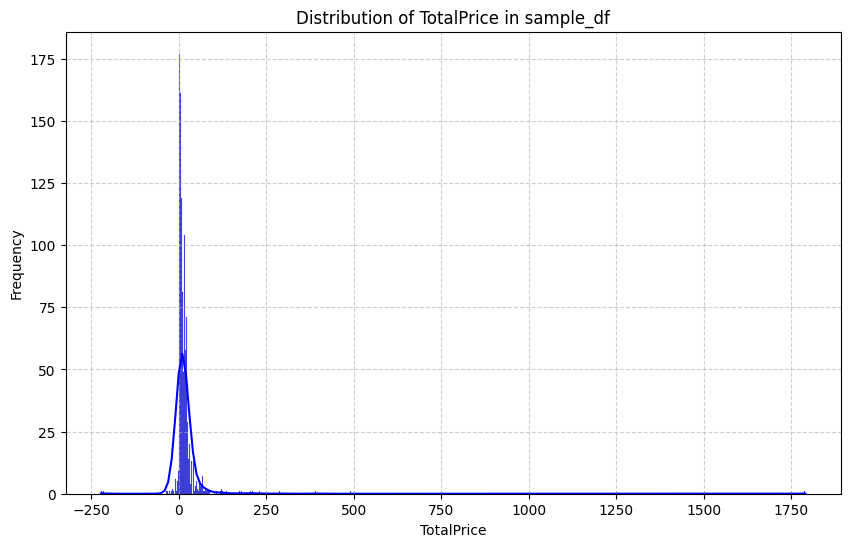

In [11]:
# --- sample_df['TotalPrice'] 히스토그램 ---

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
sns.histplot(
    sample_df['TotalPrice'],
    kde=True,      # Kernel Density Estimate (밀도 곡선)
    color='blue',
    alpha=0.7
)

plt.title('Distribution of TotalPrice in sample_df')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [12]:
# 중심극한 정리 n=30으로 1000번씩 표본추출
np.random.seed(42)
sample_means = []
n_samples = 1000
sample_size_clt = 30

for _ in range(n_samples):
    sample = df['TotalPrice'].sample(n=sample_size_clt, replace=True)
    # 표본 평균 계산
    sample_means.append(sample.mean())

sample_means_df = pd.DataFrame({'SampleMean': sample_means})

clt_mean = sample_means_df['SampleMean'].mean()
clt_std = sample_means_df['SampleMean'].std()

print(f" 모집단 평균 : {df['TotalPrice'].mean():.2f}")
print(f" 표본 평균들의 평균: {clt_mean:.2f}")
print("---")
print(f" 모집단 표준편차 : {df['TotalPrice'].std():.2f}")
pop_std = df['TotalPrice'].std()
se = pop_std / np.sqrt(sample_size_clt)
print(f" 표본 평균들의 실제 표준편차 (CLT std): {clt_std:.2f}")
print(f" 표본 평균의 이론적 표준 오차 (SE): {se:.2f}")

 모집단 평균 : 17.99
 표본 평균들의 평균: 18.15
---
 모집단 표준편차 : 378.81
 표본 평균들의 실제 표준편차 (CLT std): 18.07
 표본 평균의 이론적 표준 오차 (SE): 69.16


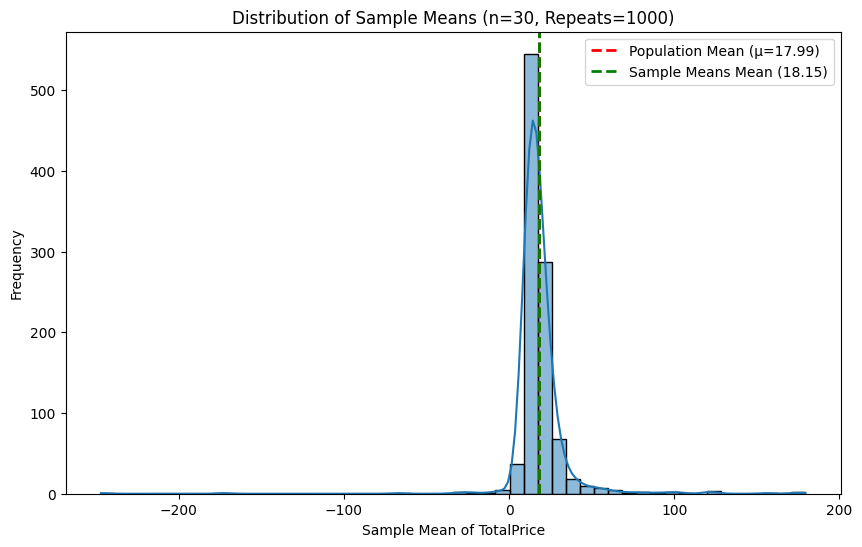

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_df['SampleMean'], kde=True, bins=50)
plt.axvline(df['TotalPrice'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Population Mean (μ={df["TotalPrice"].mean():.2f})')
plt.axvline(clt_mean, color='green', linestyle='dashed', linewidth=2, label=f'Sample Means Mean ({clt_mean:.2f})')

plt.title(f'Distribution of Sample Means (n={sample_size_clt}, Repeats={n_samples})')
plt.xlabel('Sample Mean of TotalPrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

모집단 : 극도로 비대칭(우측으로 꼬리가 김) 비정규적 형태

표본(n=1000) : 0 근처에 집중된 분포

중심극한정리 적용 표본 : 정규분포에 근접

모집단 분포가 극도로 비정규적임에도 불구하고 30개씩 추출한 표본평균은 모평균에 매우 근접하며 정규적인 분포를 보여준다.


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [14]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TotalPrice,0
DayOfWeek,0


In [15]:
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(2)
top_countries

,count
Country,
United Kingdom,495478
Germany,9495


In [16]:
# 독립표본 t검정
from scipy import stats
from scipy.stats import norm

귀무가설 : 두 집단의 평균이 같다

대립가설 : 두 집단의 평균이 다르다

In [17]:
# 상위 두 국가 확인
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(2)

country_1 = top_countries.index[0]
country_2 = top_countries.index[1]

group_1 = df[df['Country'] == country_1]['TotalPrice'].dropna()
group_2 = df[df['Country'] == country_2]['TotalPrice'].dropna()

In [18]:
# 정규성 검사 먼저 실행
def run_shapiro(data, name):
    if len(data) > 5000:
        data_sample = data.sample(n=5000, random_state=42)
    else:
        data_sample = data

    stat, p = stats.shapiro(data_sample)
    print(f"\n--- 정규성 검정 결과 ({name}) ---")
    print(f"Shapiro-Wilk 통계량: {stat:.4f}")
    print(f"P-값: {p:.4f}")

    if p < 0.05:
        print("결론: P-값이 0.05보다 작으므로, 귀무가설을 기각합니다. -> **정규분포를 따르지 않습니다.**")
    else:
        print("결론: P-값이 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. -> 정규분포를 따른다고 볼 수 있습니다.")

run_shapiro(group_1, country_1)
run_shapiro(group_2, country_2)


--- 정규성 검정 결과 (United Kingdom) ---
Shapiro-Wilk 통계량: 0.1433
P-값: 0.0000
결론: P-값이 0.05보다 작으므로, 귀무가설을 기각합니다. -> **정규분포를 따르지 않습니다.**

--- 정규성 검정 결과 (Germany) ---
Shapiro-Wilk 통계량: 0.4172
P-값: 0.0000
결론: P-값이 0.05보다 작으므로, 귀무가설을 기각합니다. -> **정규분포를 따르지 않습니다.**


정규성이 없으므로 Welch's t-test를 실행합니다.

t-검정의 핵심 가정은 모집단의 분포가 정규분포를 따른다는 것입니다.

In [19]:
# 1. 이탈 고객별 2개 그룹으로 데이터 분리
df_UK = df[df['Country'] == 'United Kingdom']['TotalPrice']
df_Ger = df[df['Country'] == 'Germany']['TotalPrice']

# 2. 그룹별 MonthlyCharges 표본평균 계산
print(f"United Kindom 요금 평균: ${df_UK.mean():.2f}")
print(f"Germany 요금 평균: ${df_Ger.mean():.2f}")

# 3. t-검정 수행
t_stat_mc, p_val_mc = stats.ttest_ind(df_UK, df_Ger, equal_var=False)
# stats.ttest_ind(): 독립된 두 표본의 평균 차이를 검정하는 함수
# equal_var=False: 두 그룹의 모분산이 다르다고 가정(등분산이 아니다)하는 Welch's t-test 수행
# 두 그룹의 분산이 같은지 여부를 미리 검증하지 않아도 되어서, 일반적인 데이터 분석에서 사용된다고 함

print(f"t-통계량: {t_stat_mc:.4f}")
print(f"p-값: {p_val_mc:.4f}")

United Kindom 요금 평균: $16.53
Germany 요금 평균: $23.35
t-통계량: -10.0464
p-값: 0.0000


p-값이 유의수준 0.05보다 작음.

t 통계량의 절댓값이 임계값 1.96보다 매우 크다.
귀무가설을 기각.
독일 고객 평균 주문금액이 영국 고객보다 유의하게 높다.

1종 오류 : 실제로는 두 국가의 평균에 차이가 없는데 **차이가 있다**고 잘못 결론 내림.
이 오류를 나타낼 확률은 0.05이하. p값이 0.0000으로 매우 낮기 때문에 낮다.

2종 오류 : 실제로는 두 국가 평균에 차이가 있는데 **차이가 없다**고 잘못 결론 내리는 오류
이 오류는 위 검증에서 귀무가설을 기각했기 때문에 범하지 않음.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12


In [21]:
# 주중과 주말 데이터 분리
# DayOfWeek: 0=월, 1=화, 2=수, 3=목, 4=금, 5=토, 6=일
weekday_prices = df[df['DayOfWeek'].isin([0, 1, 2, 3, 4])]['UnitPrice'].dropna()
weekend_prices = df[df['DayOfWeek'].isin([5, 6])]['UnitPrice'].dropna()

print(f"주중 데이터 건수: {len(weekday_prices)}")
print(f"주말 데이터 건수: {len(weekend_prices)}")

주중 데이터 건수: 477534
주말 데이터 건수: 64375


In [22]:
# 통계량 계산 코드
stats_df = pd.DataFrame({
    'Weekday': [weekday_prices.mean(), weekday_prices.median(), weekday_prices.std(), weekday_prices.var(), weekday_prices.quantile(0.25), weekday_prices.quantile(0.75), weekday_prices.max()],
    'Weekend': [weekend_prices.mean(), weekend_prices.median(), weekend_prices.std(), weekend_prices.var(), weekend_prices.quantile(0.25), weekend_prices.quantile(0.75), weekend_prices.max()]
}, index=['Mean', 'Median', 'Std. Dev', 'Variance', '25th Quantile', '75th Quantile', 'Max'])
print(stats_df)

                    Weekday      Weekend
Mean               4.843425     2.887824
Median             2.100000     1.850000
Std. Dev         103.032058     7.959497
Variance       10615.604927    63.353599
25th Quantile      1.250000     1.250000
75th Quantile      4.130000     3.750000
Max            38970.000000  1236.750000


/tmp/ipython-input-1060557544.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'])


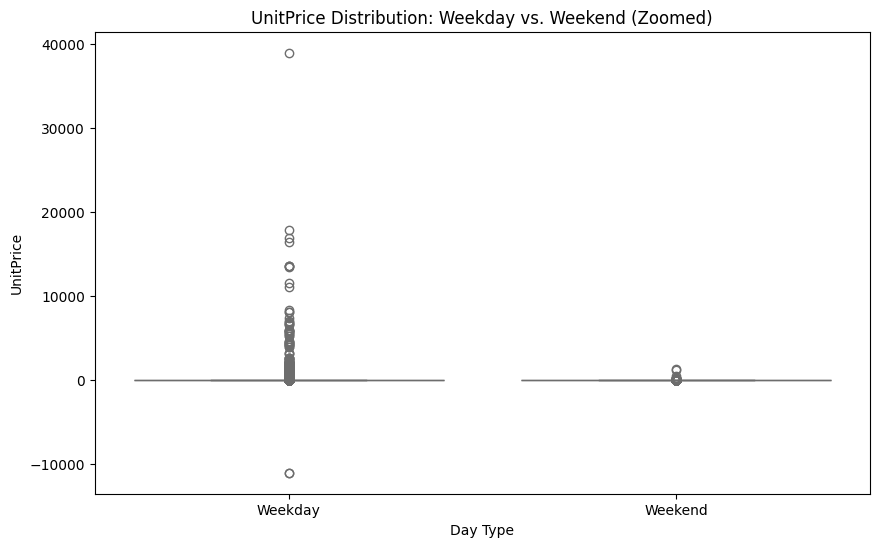

In [23]:
# 두 그룹의 데이터를 하나의 DataFrame으로 합치기
plot_df = pd.DataFrame({
    'UnitPrice': pd.concat([weekday_prices, weekend_prices]),
    'DayType': ['Weekday'] * len(weekday_prices) + ['Weekend'] * len(weekend_prices)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'])


plt.title('UnitPrice Distribution: Weekday vs. Weekend (Zoomed)')
plt.xlabel('Day Type')
plt.ylabel('UnitPrice')
plt.show()

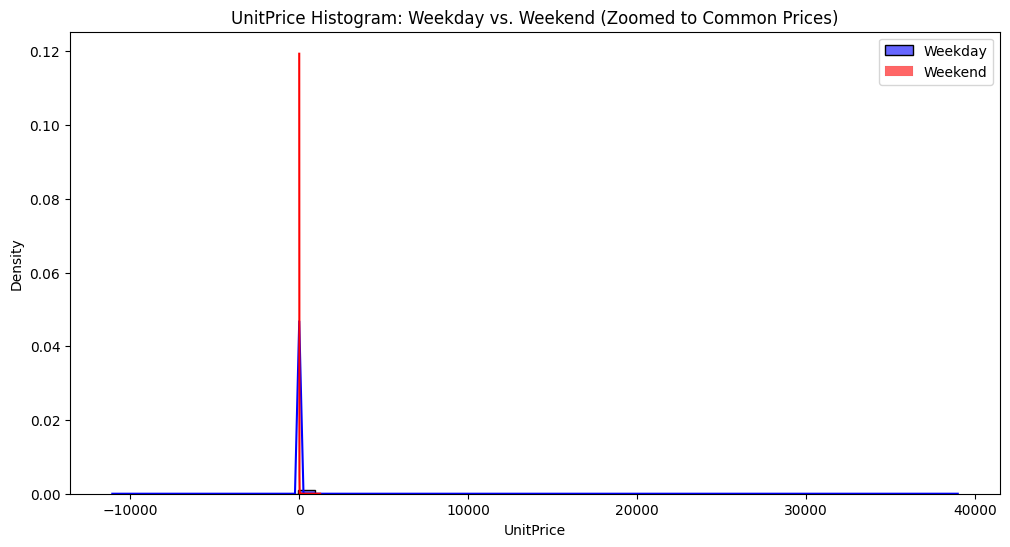

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(weekday_prices, bins=50, kde=True, color='blue', label='Weekday', alpha=0.6, stat='density')
sns.histplot(weekend_prices, bins=50, kde=True, color='red', label='Weekend', alpha=0.6, stat='density')

plt.title('UnitPrice Histogram: Weekday vs. Weekend (Zoomed to Common Prices)')
plt.xlabel('UnitPrice')
plt.ylabel('Density')
plt.legend()
plt.show()

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [25]:
# 결측치, 이상치 제거
# 판매수량 Qiantity 0 이하인 경우 = 반품 / 취소 제거
# 단가 UnitPrice 0 이하인 경우 = 무료상품 / 오류 제거
import statsmodels.api as sm
df_model = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# Quantity (판매 수량)와 UnitPrice (단가)가 0 이하인 비정상 거래 제거
# Quantity: 반품/취소 제거, UnitPrice: 무료 상품/오류 제거
df_model = df_model[(df_model['Quantity'] > 0) & (df_model['UnitPrice'] > 0)].dropna()

# 범주형 변수 정리 및 그룹핑

# 'Country' 처리: 주문 건수 상위 5개국만 남기고 나머지는 'Other'로 그룹핑
top_5_countries = df_model['Country'].value_counts().nlargest(5).index
df_model['Country_Processed'] = df_model['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)

# 더미 변수 생성 (One-Hot Encoding)
# DayOfWeek와 InvoiceMonth를 범주형으로 변환 후 더미 변수 생성
df_model['DayOfWeek'] = df_model['DayOfWeek'].astype('category')
df_model['InvoiceMonth'] = df_model['InvoiceMonth'].astype('category')

# drop_first=True를 사용하여 기준 그룹(Reference Group) 설정 및 다중공선성 방지
# 기준 그룹: Country=United Kingdom, DayOfWeek=0 (월요일), InvoiceMonth=1 (1월)
df_dummies = pd.get_dummies(
    df_model[['Country_Processed', 'DayOfWeek', 'InvoiceMonth']],
    drop_first=True
)

# Convert boolean columns to integers
df_dummies = df_dummies.astype(int)

# 최종 모델링 데이터셋 준비
df_final = pd.concat([df_model[['Quantity', 'UnitPrice']], df_dummies], axis=1)

In [26]:
#  다중 선형 회귀 분석 실행 ---

# 종속 변수 (Y): Quantity (판매 수량)
Y = df_final['Quantity']

# 독립 변수 (X): UnitPrice와 생성된 더미 변수들
X = df_final.drop('Quantity', axis=1)

# 절편 (Intercept) 추가: 상수항을 모델에 추가
X = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(Y, X).fit()


In [27]:
# 회귀 분석 결과 해석 및 출력 ---

print("\n" + "="*50)
print("### 📊 다중 선형 회귀 분석 결과 (OLS) ###")
print("="*50)

# 주요 통계량 출력
print(f"종속 변수: Quantity")
print(f"관측치 수 (N): {model.nobs:.0f}")
print("-" * 50)
print(f"결정 계수 (R-squared): {model.rsquared:.4f}")
print(f"조정된 R-squared: {model.rsquared_adj:.4f}")
print(f"F-통계량 P-값: {model.f_pvalue:.4f} (모델의 유의성)")
print("=" * 50)
print("### 📝 회귀 계수 (Coefficients) 및 유의성 ###")
print("-" * 50)
print(model.summary().tables[1]) # 계수 테이블 출력

# 결과 해석 요약 ---

# UnitPrice 계수 추출
unit_price_coef = model.params['UnitPrice']
unit_price_p = model.pvalues['UnitPrice']

print("\n" + "="*50)
print("### 🔑 최종 결과 해석 요약 ###")
print("-" * 50)
print(f"1. **모델 설명력 (R-squared):** {model.rsquared:.4f}")
print(f"   -> 모델의 설명력은 {model.rsquared:.2f}이므로, 판매 수량의 변동을 예측하기에는 부족할 수 있습니다.")

print(f"2. **UnitPrice 영향:** 계수 = {unit_price_coef:.4f}, P-값 = {unit_price_p:.4f}")
if unit_price_p < 0.05:
    print(f"   -> **통계적으로 유의**합니다. 단가가 1 증가할 때 판매 수량은 {unit_price_coef:.4f}만큼 감소합니다.")
else:
    print(f"   -> 통계적으로 유의하지 않습니다.")

print("\n3. **범주형 변수 해석:**")
print(f"   -> 모든 계수는 해당 그룹이 기준 그룹(UK, 월요일, 1월) 대비 Quantity에 미치는 영향을 나타냅니다.")
print(f"   -> P-값이 0.05 미만인 계수들만 통계적으로 유의한 차이를 나타냅니다.")
print("-" * 50)


### 📊 다중 선형 회귀 분석 결과 (OLS) ###
종속 변수: Quantity
관측치 수 (N): 530104
--------------------------------------------------
결정 계수 (R-squared): 0.0007
조정된 R-squared: 0.0007
F-통계량 P-값: 0.0000 (모델의 유의성)
### 📝 회귀 계수 (Coefficients) 및 유의성 ###
--------------------------------------------------
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               18.2896      1.992      9.180      0.000      14.385      22.195
UnitPrice                           -0.0172      0.006     -2.898      0.004      -0.029      -0.006
Country_Processed_France            -5.3507      2.438     -2.194      0.028     -10.130      -0.572
Country_Processed_Germany           -5.4961      2.397     -2.293      0.022     -10.194      -0.798
Country_Processed_Other             11.4268      2.117      5.399      0.000       7.278      15.575
Country_Proc

단가 : 단가가 올라가면 판매수량 유의하게 감소

요일 : 월요일에 비해 화, 수, 목요일에 판매수량이 많음

국가 : 주요국가가 기존그룹 대비 판매수량이 적음. Other그룹에 판매수량이 가장 많음

월 : 11월은 1월기준 유의하게 적음

결정계수 R^2 = 0.0007 > 독립 변수들이 종속변수의 약 0.07%를 설명하기 때문에 설명력이 극히 낮음

조정된 R^2 변수 개수를 반영해도 설명력은 동일하게 낮음

F-통계량 P-값 : 모델 전체는 통계적으로 유의미하지만 R^2의 값이 너무 낮아서 실제 예측에 활용하기에는 부적절하다.

회귀 계수(coef)는 UnitPrice에서 -0.0172, P-Value는 0.004이므로 상품 단가가 1 증가할 때, 판매 수량은 평균 0.0172만큼 유의미하게 감소하고 있음.

Country_UK... 등의 coef의 값은 -8.8565이므로 기준 국가대비 8.86개 적음.
Contry_Other 은 11개정도 높다.
DayOfWeek_3(목요일)은 2.2436으로 월요일대비 2.24개 많음.
InvoiceMonth_11 11월의 판매수량이 1월대비 2.01개 적음.

결론 : 모델의 설명력은 매우매우매우 낮지만, 각 개별 변수들의 영향력은 통계적으로 유의미합니다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [28]:
# 'InvoiceNo'가 'C'로 시작하면 반품(취소)으로 간주 (더 정확한 IsReturn 정의)
# Quantity가 음수인 경우는 반품으로 간주

# 1. 데이터 클리닝 및 복사
df_logi = df.copy()

# 2. IsReturn 피처 생성
# Quantity가 0보다 작으면 반품(IsReturn=1), 아니면 정상 거래(IsReturn=0)로 정의
# 주의: InvoiceNo가 'C'로 시작하지 않더라도 Quantity가 음수이면 반품으로 간주합니다.
df_logi['IsReturn'] = (df_logi['Quantity'] < 0).astype(int)

# 3. 모델링을 위해 Quantity를 양수로 통일 (반품 여부는 IsReturn이 담당)
df_logi['Quantity'] = df_logi['Quantity'].abs()

# 4. 이상치/결측치 처리
# UnitPrice가 0 이하인 경우 제거 (무료 상품/오류)
df_logi = df_logi[df_logi['UnitPrice'] > 0].dropna()

# 5. 종속변수 (Y): IsReturn, 독립변수 (X) 후보
# DayOfWeek, InvoiceMonth는 이미 앞선 과정에서 생성되었다고 가정
df_logi = df_logi[['IsReturn', 'UnitPrice', 'Quantity', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

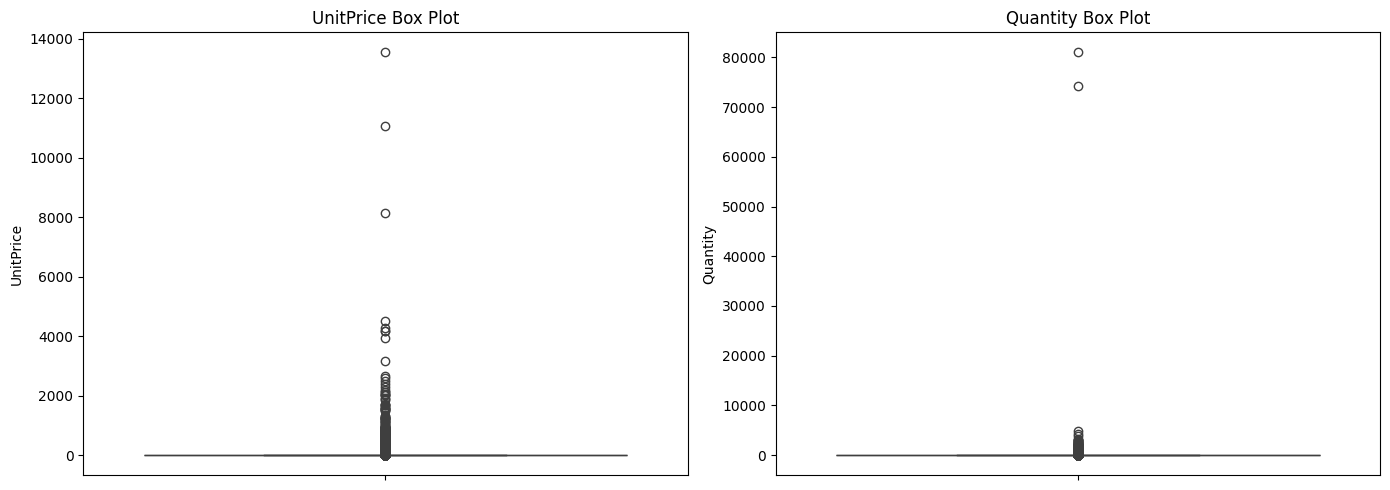


--- UnitPrice IQR 이상치 분석 ---
Q1 (25%): 1.25
Q3 (75%): 4.13
IQR: 2.88
하한 경계: -3.07
상한 경계: 8.45
이상치 개수: 37999개
이상치 비율: 7.17%
상위 5개 이상치 값:
15017     13541.33
299982    11062.06
173382     8142.75
297723     4505.17
268028     4287.63
Name: UnitPrice, dtype: float64

--- Quantity IQR 이상치 분석 ---
Q1 (25%): 1.00
Q3 (75%): 10.00
IQR: 9.00
하한 경계: -12.50
상한 경계: 23.50
이상치 개수: 56363개
이상치 비율: 10.63%
상위 5개 이상치 값:
540421    80995
61619     74215
421632     4800
206121     4300
97432      3906
Name: Quantity, dtype: int64


In [29]:
# --- 1. 시각적 확인 (Box Plot) ---

plt.figure(figsize=(14, 5))

#  UnitPrice Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(y=df_model['UnitPrice'])
plt.title('UnitPrice Box Plot')
plt.ylabel('UnitPrice')

#  Quantity Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_model['Quantity'])
plt.title('Quantity Box Plot')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

# --- 통계적 확인 (IQR 기준 계산) ---

def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    print(f"\n--- {series.name} IQR 이상치 분석 ---")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"하한 경계: {lower_bound:.2f}")
    print(f"상한 경계: {upper_bound:.2f}")
    print(f"이상치 개수: {len(outliers)}개")
    print(f"이상치 비율: {(len(outliers) / len(series) * 100):.2f}%")

    # 상위 5개 이상치 값 출력
    if len(outliers) > 0:
        print(f"상위 5개 이상치 값:\n{outliers.nlargest(5)}")

    return lower_bound, upper_bound

# UnitPrice 이상치 확인
lb_price, ub_price = identify_outliers_iqr(df_model['UnitPrice'])

# Quantity 이상치 확인
lb_qty, ub_qty = identify_outliers_iqr(df_model['Quantity'])

이상치의 비율이 너무 많으므로 제거하지 않고 진행.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# 1. 범주형 변수 더미화 (Country, InvoiceMonth)
# 상위 5개국만 유지하고 나머지는 'Other'로 묶는 처리 적용 (앞선 회귀 모델과 동일)
top_5_countries = df_logi['Country'].value_counts().nlargest(5).index
df_logi['Country_Processed'] = df_logi['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)

# DayOfWeek, InvoiceMonth는 범주형으로 변환
df_logi['DayOfWeek'] = df_logi['DayOfWeek'].astype('category')
df_logi['InvoiceMonth'] = df_logi['InvoiceMonth'].astype('category')


# 더미 변수 생성 (drop_first=True로 기준 그룹 설정)
X_dummies = pd.get_dummies(
    df_logi[['Country_Processed', 'InvoiceMonth']],
    drop_first=True
)

# 독립변수 X 구성: UnitPrice, Quantity (연속형) + 더미 변수
X = pd.concat([df_logi[['UnitPrice', 'Quantity']], X_dummies], axis=1)

# 상수항 추가
X = sm.add_constant(X, prepend=False)
Y = df_logi['IsReturn']

# 2. 데이터 분할 (Train: 70%, Test: 30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y # stratify=Y를 통해 반품 비율 유지
)

# 3. 연속형 변수 표준화 (선택 사항이지만 모델 안정성을 위해 적용)
scaler = StandardScaler()
X_train[['UnitPrice', 'Quantity']] = scaler.fit_transform(X_train[['UnitPrice', 'Quantity']])
X_test[['UnitPrice', 'Quantity']] = scaler.transform(X_test[['UnitPrice', 'Quantity']])

# Convert boolean columns to integers after splitting and scaling
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [31]:
# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit(disp=0) # disp=0: 학습 과정 출력 생략

print("="*60)
print("### 로지스틱 회귀 분석 결과 (Logit) ###")
print("="*60)
print(result.summary().tables[1]) # 계수 테이블 출력

# 예측 확률을 바탕으로 클래스 예측 (임계값 0.5)
Y_pred_proba = result.predict(X_test)
Y_pred = (Y_pred_proba >= 0.5).astype(int)

### 로지스틱 회귀 분석 결과 (Logit) ###
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
UnitPrice                            0.0678      0.009      7.604      0.000       0.050       0.085
Quantity                             0.0111      0.004      2.831      0.005       0.003       0.019
Country_Processed_France            -0.8313      0.126     -6.579      0.000      -1.079      -0.584
Country_Processed_Germany            0.1663      0.095      1.752      0.080      -0.020       0.352
Country_Processed_Other             -0.2757      0.092     -2.998      0.003      -0.456      -0.095
Country_Processed_Spain             -0.7167      0.189     -3.800      0.000      -1.086      -0.347
Country_Processed_United Kingdom    -0.5905      0.075     -7.846      0.000      -0.738      -0.443
InvoiceMonth_2                      -0.3316      0.075     -4

In [32]:
# 혼동 행렬
cm = confusion_matrix(Y_test, Y_pred)

print("\n" + "="*50)
print("### 1. 혼동 행렬 (Confusion Matrix) ###")
print("-" * 50)
print(f"TN: {cm[0, 0]}, FP: {cm[0, 1]}")
print(f"FN: {cm[1, 0]}, TP: {cm[1, 1]}")
print("\n" + str(cm))


### 1. 혼동 행렬 (Confusion Matrix) ###
--------------------------------------------------
TN: 119359, FP: 6
FN: 2662, TP: 10

[[119359      6]
 [  2662     10]]


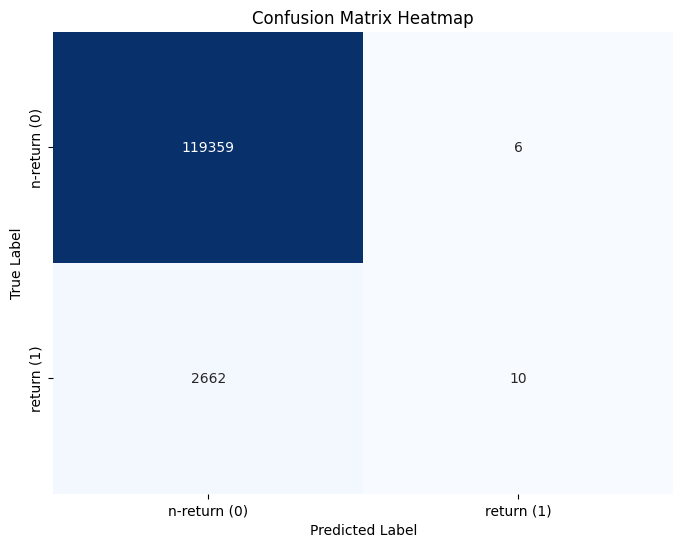

In [33]:
class_names = ['n-return (0)', 'return (1)']

# --- 히트맵 시각화 ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:
# 분류 보고서
report = classification_report(Y_test, Y_pred, zero_division=0)
print("\n" + "="*50)
print("### 2. 분류 보고서 (Classification Report) ###")
print("-" * 50)
print(report)

# 주요 지표 추출
precision_return = precision_score(Y_test, Y_pred, pos_label=1, zero_division=0)
recall_return = recall_score(Y_test, Y_pred, pos_label=1, zero_division=0)
f1_return = f1_score(Y_test, Y_pred, pos_label=1, zero_division=0)

print(f" 반품 정밀도 (Precision): {precision_return:.4f} (예측된 반품 중 실제 반품 비율)")
print(f" 반품 재현율 (Recall): {recall_return:.4f} (실제 반품 중 예측 성공 비율)")
print(f" 반품 F1-Score: {f1_return:.4f} (정밀도와 재현율의 조화평균)")


### 2. 분류 보고서 (Classification Report) ###
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    119365
           1       0.62      0.00      0.01      2672

    accuracy                           0.98    122037
   macro avg       0.80      0.50      0.50    122037
weighted avg       0.97      0.98      0.97    122037

 반품 정밀도 (Precision): 0.6250 (예측된 반품 중 실제 반품 비율)
 반품 재현율 (Recall): 0.0037 (실제 반품 중 예측 성공 비율)
 반품 F1-Score: 0.0074 (정밀도와 재현율의 조화평균)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced', # 반품(1) 클래스에 가중치 부여
    n_jobs=-1 # 모든 코어 사용
)
rf_model.fit(X_train, Y_train)

# Test 데이터셋으로 예측
Y_pred_rf = rf_model.predict(X_test)

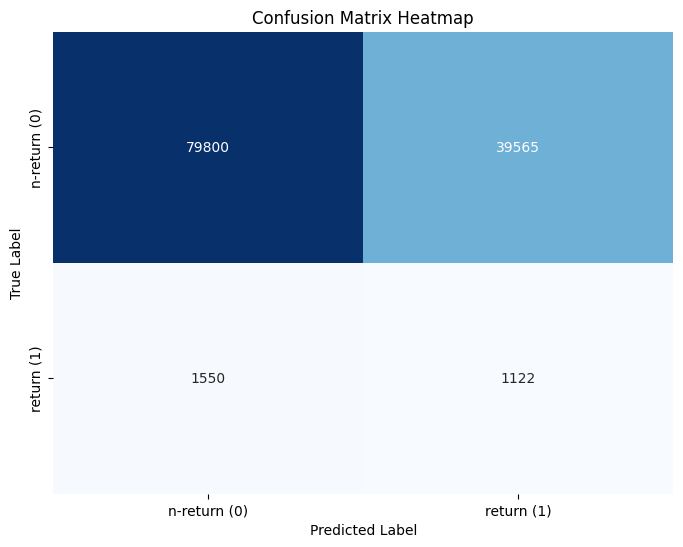

In [49]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

class_names = ['n-return (0)', 'return (1)']

# --- 히트맵 시각화 ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=False
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [37]:
report_rf = classification_report(Y_test, Y_pred_rf, zero_division=0)

print("\n" + "="*50)
print("### 2. 랜덤 포레스트 분류 보고서 (IsReturn=1) ###")
print("-" * 50)
print(report_rf)

# 주요 지표 추출 (반품 클래스, 즉 '1'에 초점)
precision_rf = precision_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
recall_rf = recall_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
f1_rf = f1_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)

print(f" 반품 정밀도 (Precision): {precision_rf:.4f}")
print(f" 반품 재현율 (Recall): {recall_rf:.4f}")
print(f" 반품 F1-Score: {f1_rf:.4f}")


### 2. 랜덤 포레스트 분류 보고서 (IsReturn=1) ###
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    119365
           1       0.03      0.42      0.05      2672

    accuracy                           0.66    122037
   macro avg       0.50      0.54      0.42    122037
weighted avg       0.96      0.66      0.78    122037

 반품 정밀도 (Precision): 0.0276
 반품 재현율 (Recall): 0.4199
 반품 F1-Score: 0.0518


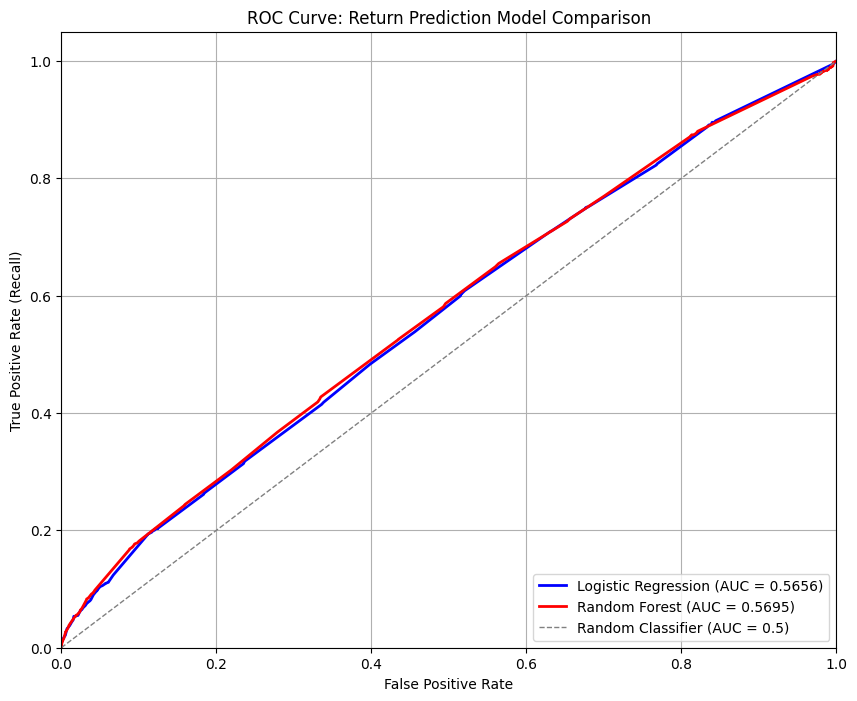

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.figure(figsize=(10, 8))

# --- 1. Logistic Regression Model ROC Curve and AUC Calculation ---
# Y_pred_proba: 로지스틱 회귀 모델의 예측 확률
# Y_test: 실제 레이블

fpr_logit, tpr_logit, thresholds_logit = roc_curve(Y_test, Y_pred_proba)
auc_logit = auc(fpr_logit, tpr_logit)

# ROC Curve plotting (Logistic Regression)
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {auc_logit:.4f})')

# --- 2. Random Forest Model ROC Curve and AUC Calculation ---
# Y_pred_proba_rf: 랜덤 포레스트 모델의 예측 확률
Y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve plotting (Random Forest)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2,
         label=f'Random Forest (AUC = {auc_rf:.4f})')


# ---  Graph Settings  ---
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1,
         label='Random Classifier (AUC = 0.5)') # 랜덤 분류기 선

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') # 거짓 양성률
plt.ylabel('True Positive Rate (Recall)') # 참 양성률 (재현율)
plt.title('ROC Curve: Return Prediction Model Comparison') # ROC 곡선: 반품 예측 모델 비교
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [39]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# --- 0. 성능 지표 계산 (이전 단계에서 정의된 Y_test, Y_pred, Y_pred_rf 변수 사용 가정) ---

# 로지스틱 회귀 모델 지표
acc_logit = accuracy_score(Y_test, Y_pred)
recall_logit = recall_score(Y_test, Y_pred, pos_label=1, zero_division=0)
f1_logit = f1_score(Y_test, Y_pred, pos_label=1, zero_division=0)
auc_logit = roc_auc_score(Y_test, Y_pred_proba) # Y_pred_proba는 확률값

# 랜덤 포레스트 모델 지표
acc_rf = accuracy_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
f1_rf = f1_score(Y_test, Y_pred_rf, pos_label=1, zero_division=0)
# Y_pred_proba_rf는 이전에 rf_model.predict_proba(X_test)[:, 1]로 계산됨
Y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(Y_test, Y_pred_proba_rf)

# --- 1. 결과 데이터프레임 생성 ---
data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_logit, acc_rf],
    "Recall": [recall_logit, recall_rf],
    "F1-Score": [f1_logit, f1_rf],
    "ROC-AUC": [auc_logit, auc_rf]
}
result_df = pd.DataFrame(data)

# --- 2. 성능 등급 자동 태그 함수 ---
def performance_tag(value):
    if value >= 0.9:
        return "🟢 Excellent"
    elif value >= 0.8:
        return "🟡 Good"
    else:
        return "🔴 Fair"

# --- 3. 등급 컬럼 추가 및 스타일링 ---
df_colored = result_df.copy()
df_colored.columns = [
    "Model",
    "Accuracy\n(정확도)",
    "Recall\n(재현율)",
    "F1-Score\n(정밀도+재현율\n조화평균)",
    "ROC-AUC\n(모델 전체\n구분력)"
]

# 각 지표별 등급 계산
df_colored["등급\n(정확도)"] = df_colored["Accuracy\n(정확도)"].apply(performance_tag)
df_colored["등급\n(재현율)"] = df_colored["Recall\n(재현율)"].apply(performance_tag)
df_colored["등급\n(AUC)"] = df_colored["ROC-AUC\n(모델 전체\n구분력)"].apply(performance_tag)

# Style 표 + Caption 설정
styled = (
    df_colored.style
    .format(subset=["Accuracy\n(정확도)", "Recall\n(재현율)", "F1-Score\n(정밀도+재현율\n조화평균)", "ROC-AUC\n(모델 전체\n구분력)"], formatter="{:.4f}")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'),
                                     ('white-space', 'pre-line'),
                                     ('background-color', '#222'),
                                     ('color', 'white'),
                                     ('border', '1px solid #555')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                     ('border', '1px solid #555')]}
    ])
    .set_caption(" 반품 예측 모델 성능 비교 및 등급 평가")
)

display(styled)

# --- 4. 평가 기준 해설 및 요약 결론 ---

print("\n" + "="*50)
print("###  성능 평가 기준 해설")
print("-" * 50)
print(f"- Accuracy (정확도): 전체 거래 중 반품/정상을 정확히 구분한 비율 (0.9 이상이면 🟢 Excellent)")
print(f"- Recall (재현율): 실제 반품 거래 중 반품으로 탐지한 비율 (0.8 이상 🟡 Good, 0.9 이상 🟢 Excellent)")
print(f"- F1-Score (정밀도+재현율 조화평균): 탐지(Recall)와 정밀도(Precision)의 균형 지표")
print(f"- ROC-AUC (모델 전체 구분력): 반품과 정상 거래를 구분하는 전체 능력 (0.8 이상 🟡 Good, 0.9 이상 🟢 Excellent)")

# 요약 결론
best_auc_model = df_colored.iloc[df_colored["ROC-AUC\n(모델 전체\n구분력)"].idxmax(), 0]
best_recall_model = df_colored.iloc[df_colored["Recall\n(재현율)"].idxmax(), 0]

print("\n" + "="*50)
print("###  최종 모델 비교 요약 결론")
print("-" * 50)

print(f"[ 요약 결론 case 1 ] ROC-AUC 기준 최적 모델은 **{best_auc_model}** 입니다. (전반적인 구분력 최고)")

print(f"\n[ 요약 결론 case 2: 실무적 고려 ]")
print(f"- ROC-AUC 기준 최적 모델: **{best_auc_model}** (구분력 최고)")
print(f"- Recall 기준 최적 모델: **{best_recall_model}** (실제 반품 탐지율 최고)")
print(f"\n 반품 예측에서는 **실제 반품을 놓치지 않는 것(높은 Recall)**이 중요합니다 (재고 및 물류 비용 손실 방지). 따라서 종합적으로 **{best_recall_model}** 모델이 실용적으로 가장 적합할 수 있습니다.")
print("="*50)

,Model,Accuracy (정확도),Recall (재현율),F1-Score (정밀도+재현율 조화평균),ROC-AUC (모델 전체 구분력),등급 (정확도),등급 (재현율),등급 (AUC)
0,Logistic Regression,0.9781,0.0037,0.0074,0.5656,🟢 Excellent,🔴 Fair,🔴 Fair
1,Random Forest,0.6631,0.4199,0.0518,0.5695,🔴 Fair,🔴 Fair,🔴 Fair



###  성능 평가 기준 해설
--------------------------------------------------
- Accuracy (정확도): 전체 거래 중 반품/정상을 정확히 구분한 비율 (0.9 이상이면 🟢 Excellent)
- Recall (재현율): 실제 반품 거래 중 반품으로 탐지한 비율 (0.8 이상 🟡 Good, 0.9 이상 🟢 Excellent)
- F1-Score (정밀도+재현율 조화평균): 탐지(Recall)와 정밀도(Precision)의 균형 지표
- ROC-AUC (모델 전체 구분력): 반품과 정상 거래를 구분하는 전체 능력 (0.8 이상 🟡 Good, 0.9 이상 🟢 Excellent)

###  최종 모델 비교 요약 결론
--------------------------------------------------
[ 요약 결론 case 1 ] ROC-AUC 기준 최적 모델은 **Random Forest** 입니다. (전반적인 구분력 최고)

[ 요약 결론 case 2: 실무적 고려 ]
- ROC-AUC 기준 최적 모델: **Random Forest** (구분력 최고)
- Recall 기준 최적 모델: **Random Forest** (실제 반품 탐지율 최고)

 반품 예측에서는 **실제 반품을 놓치지 않는 것(높은 Recall)**이 중요합니다 (재고 및 물류 비용 손실 방지). 따라서 종합적으로 **Random Forest** 모델이 실용적으로 가장 적합할 수 있습니다.


로지스틱 회귀 : 선형모델이므로 독립변수와 종속변수간의 관계가 직선적이라고 가정함. 현실 세계의 복잡한 데이터 패턴을 선형적으로 설명하기 어려움.

랜덤포레스트 : 앙상블 및 비선형 모델이므로 여러 개의 의사결정 트리를 조합해서 복잡한 곡선, 비선형적 상호작용을 자동으로 학습함. 복합적인 조건을 기반으로 예측함.

이에 따라서 반품 데이터의 특성은 데이터 불균형이 심하고 극단적인 이상치가 존재하므로 이상치에 덜 민감한 랜덤 포레스트를 사용함이 좋음.

In [50]:
# 만약 로지스틱 회귀모델의 성능을 더 높이려면?

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, roc_auc_score, f1_score

# 1. 초기 데이터 클리닝 및 피처 생성

df_logi = df.copy()

# 1-1. IsReturn 피처 생성 (Quantity가 음수이면 반품=1)
df_logi['IsReturn'] = (df_logi['Quantity'] < 0).astype(int)

# 1-2. Quantity를 양수로 통일
df_logi['Quantity'] = df_logi['Quantity'].abs()

# 1-3. 이상치/결측치 처리 (UnitPrice > 0)
df_logi = df_logi[df_logi['UnitPrice'] > 0].dropna()

# 1-4. Country 그룹핑 및 범주형 변수 설정
top_5_countries = df_logi['Country'].value_counts().nlargest(5).index
df_logi['Country_Processed'] = df_logi['Country'].apply(
    lambda x: x if x in top_5_countries else 'Other'
)
df_logi['DayOfWeek'] = df_logi['DayOfWeek'].astype('category')
df_logi['InvoiceMonth'] = df_logi['InvoiceMonth'].astype('category')


# ====================================================================
# 2. 성능 개선을 위한 피처 엔지니어링 (로그 변환 & 상호작용)
# ====================================================================

# 2-1. 로그 변환 (이상치 및 비선형성 해결)
# np.log1p(x) = log(1+x), 0 이상의 값에 대해 안정적으로 로그 변환
df_logi['Log_UnitPrice'] = np.log1p(df_logi['UnitPrice'])
df_logi['Log_Quantity'] = np.log1p(df_logi['Quantity'])

# 2-2. 상호작용 항 추가 (비선형 관계 포착)
df_logi['Price_Qty_Interaction'] = df_logi['Log_UnitPrice'] * df_logi['Log_Quantity']


# ====================================================================
# 3. 모델링 데이터셋 구성 및 분할
# ====================================================================

# 3-1. 최종 데이터프레임 구성 전 인덱스 통일
df_logi = df_logi.reset_index(drop=True) # 전체 df의 인덱스 초기화

# 더미 변수 생성 (df_logi의 인덱스를 따름)
X_dummies = pd.get_dummies(
    df_logi[['Country_Processed', 'InvoiceMonth']],
    drop_first=True
)
# X_dummies도 인덱스를 초기화 (안정성 확보)
X_dummies = X_dummies.reset_index(drop=True).astype(int)

# 독립변수 X_new 구성 (Index 통일되었으므로 안전하게 concat)
X_new = pd.concat([
    df_logi[['Log_UnitPrice', 'Log_Quantity', 'Price_Qty_Interaction']],
    X_dummies
], axis=1)

Y_new = df_logi['IsReturn']

# 3-2. 데이터 분할 (Train: 70%, Test: 30%)
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(
    X_new, Y_new, test_size=0.3, random_state=42, stratify=Y_new # stratify=Y를 통해 반품 비율 유지
)

# 3-3. 연속형 변수 표준화
scaler_new = StandardScaler()
cont_cols = ['Log_UnitPrice', 'Log_Quantity', 'Price_Qty_Interaction']

X_train_new[cont_cols] = scaler_new.fit_transform(X_train_new[cont_cols])
X_test_new[cont_cols] = scaler_new.transform(X_test_new[cont_cols])


# ====================================================================
# 4. 개선된 로지스틱 회귀 모델 학습 및 성능 평가
# ====================================================================

# 모델 학습
logit_model_new = sm.Logit(Y_train_new, X_train_new)
result_new = logit_model_new.fit(disp=0)

# 예측 확률 계산
Y_pred_proba_new = result_new.predict(X_test_new)

# 임계값 조정 (Recall 개선을 위해 0.5 대신 0.35 사용)
optimal_threshold = 0.35
Y_pred_new = (Y_pred_proba_new >= optimal_threshold).astype(int)


# --- 결과 출력 ---
print("\n" + "="*70)
print("###  개선된 로지스틱 회귀 모델 (로그 변환 & 상호작용) 결과 ###")
print("="*70)
print(result_new.summary().tables[1]) # 새로운 계수 테이블 출력

# 주요 지표 계산 및 출력
recall_new = recall_score(Y_test_new, Y_pred_new, pos_label=1, zero_division=0)
f1_new = f1_score(Y_test_new, Y_pred_new, pos_label=1, zero_division=0)
auc_new = roc_auc_score(Y_test_new, Y_pred_proba_new)

print("-" * 70)
print(f" 개선된 모델의 ROC-AUC (모델 전반적 구분력): {auc_new:.4f}")
print(f" 사용된 임계값 (Threshold): {optimal_threshold} (Recall 개선 목적)")
print(f" 개선된 모델의 재현율 (Recall): {recall_new:.4f}")
print(f" 개선된 모델의 F1-Score: {f1_new:.4f}")
print("="*70)


###  개선된 로지스틱 회귀 모델 (로그 변환 & 상호작용) 결과 ###
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Log_UnitPrice                        0.4309      0.020     22.084      0.000       0.393       0.469
Log_Quantity                        -0.1664      0.027     -6.091      0.000      -0.220      -0.113
Price_Qty_Interaction               -0.4175      0.028    -14.903      0.000      -0.472      -0.363
Country_Processed_France            -2.7593      0.105    -26.336      0.000      -2.965      -2.554
Country_Processed_Germany           -1.7935      0.064    -28.091      0.000      -1.919      -1.668
Country_Processed_Other             -2.0957      0.060    -35.090      0.000      -2.213      -1.979
Country_Processed_Spain             -3.0161      0.177    -17.061      0.000      -3.363      -2.670
Country_Processed_United Kingdom    -2.7202     

recall 값이 0.0037에서 0.0079로 약 2배정도 높아짐.